In [273]:
import pandas as pd
import numpy as np
import pymysql

import matplotlib.pyplot as plt
import seaborn as sns

import folium


In [303]:
import warnings
warnings.filterwarnings("ignore")

## 1. Database Setup and Import :

- Create a MySQL database.

- Load the provided crime dataset into the MySQL database.

## 2. Database Connection :

   - Use PyMySQL to establish a connection to the database in Pycharm or VS code.

   - Verify the successful import of data in pycharm.

In [274]:
conn = pymysql.connect(
    host = 'localhost',
    user = 'root',
    password = "123456789",
    db = 'odin_mini_capstone'
)

try:
    with conn.cursor() as curr:
        query = "SELECT * FROM crime_data"
        curr.execute(query)

        column_names = [column[0] for column in curr.description]
        results = curr.fetchall()

        df = pd.DataFrame(results, columns = column_names)


except pymysql.Error as e:
    print("Error:",e)
finally:
    conn.close()

In [333]:
df.head()

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,2020-01-08,2020-01-08,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,2020-01-02,2020-01-01,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,2020-01-01,2020-01-01,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,2020-01-01,2020-01-01,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,2020-01-02,2020-01-02,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26


## 3. Data Exploration:

   - Retrieve basic statistics on the dataset, such as the total number of records and unique values in specific columns.

   - Identify the distinct crime codes and their descriptions.

## Basic statistics on the dataset,


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DR_NO        499 non-null    int64  
 1   Date_Rptd    499 non-null    object 
 2   DATE_OCC     499 non-null    object 
 3   AREA_NAME    499 non-null    object 
 4   Crm_Cd       499 non-null    int64  
 5   Crm_Cd_Desc  499 non-null    object 
 6   Vict_Age     499 non-null    int64  
 7   Vict_Sex     499 non-null    object 
 8   Premis_Desc  499 non-null    object 
 9   Status       499 non-null    object 
 10  Location     499 non-null    object 
 11  LAT          499 non-null    float64
 12  LON          499 non-null    float64
dtypes: float64(2), int64(3), object(8)
memory usage: 50.8+ KB


In [291]:
# Converting the data type of two columns to datetime
df['Date_Rptd'] = pd.to_datetime(df['Date_Rptd'], errors='coerce')
df['DATE_OCC'] = pd.to_datetime(df['DATE_OCC'], errors='coerce')

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DR_NO        499 non-null    int64         
 1   Date_Rptd    499 non-null    datetime64[ns]
 2   DATE_OCC     499 non-null    datetime64[ns]
 3   AREA_NAME    499 non-null    object        
 4   Crm_Cd       499 non-null    int64         
 5   Crm_Cd_Desc  499 non-null    object        
 6   Vict_Age     499 non-null    int64         
 7   Vict_Sex     499 non-null    object        
 8   Premis_Desc  499 non-null    object        
 9   Status       499 non-null    object        
 10  Location     499 non-null    object        
 11  LAT          499 non-null    float64       
 12  LON          499 non-null    float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(6)
memory usage: 50.8+ KB


In [293]:
df.nunique()

DR_NO          499
Date_Rptd       68
DATE_OCC        61
AREA_NAME       19
Crm_Cd          42
Crm_Cd_Desc     42
Vict_Age        66
Vict_Sex         4
Premis_Desc     67
Status           4
Location       365
LAT             35
LON             29
dtype: int64

In [294]:
df.describe()

,DR_NO,Crm_Cd,Vict_Age,LAT,LON
count,4.990000e+02,499.000000,499.000000,499.000000,499.000000
mean,1.999930e+08,504.178357,32.142285,34.047335,-118.261283
std,8.742243e+06,198.381863,20.202136,0.053840,0.041560
min,1.030447e+07,210.000000,0.000000,33.710000,-118.560000
25%,2.001044e+08,330.000000,23.000000,34.040000,-118.260000
50%,2.001048e+08,442.000000,31.000000,34.050000,-118.250000
75%,2.001064e+08,624.000000,46.500000,34.050000,-118.240000
max,2.220130e+08,956.000000,78.000000,34.280000,-118.190000


### Distinct crime codes and their descriptions


In [295]:
unique_codes = df[['Crm_Cd','Crm_Cd_Desc']].drop_duplicates()
unique_codes.style.hide()

Crm_Cd,Crm_Cd_Desc
624,BATTERY - SIMPLE ASSAULT
745,VANDALISM - MISDEAMEANOR ($399 OR UNDER)
740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)"
442,SHOPLIFTING - PETTY THEFT ($950 & UNDER)
946,OTHER MISCELLANEOUS CRIME
341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD"
330,BURGLARY FROM VEHICLE
930,CRIMINAL THREATS - NO WEAPON DISPLAYED
648,ARSON
354,THEFT OF IDENTITY


## 4. Temporal Analysis:

   - Analyze the temporal aspects of the data.

   - Determine trends in crime occurrence over time.

In [296]:
# Sorting the date columns
sorted_rptd = sorted(df['Date_Rptd'])
sorted_Occ = sorted(df['DATE_OCC'])

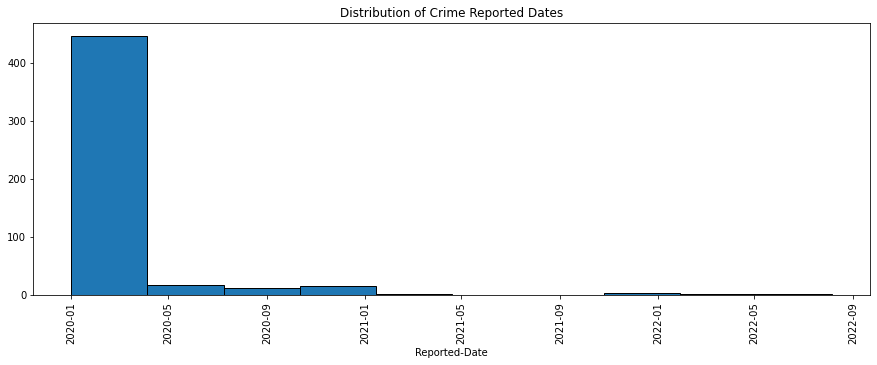

In [300]:
# Distribution of Crime Reported Dates

plt.figure(figsize =(15,5))
# sns.distplot(df['Date_Rptd'])
plt.hist(df['Date_Rptd'],bins=10,edgecolor="black")
plt.title('Distribution of Crime Reported Dates')
plt.xlabel('Reported-Date')
plt.xticks(rotation=90)
plt.show()

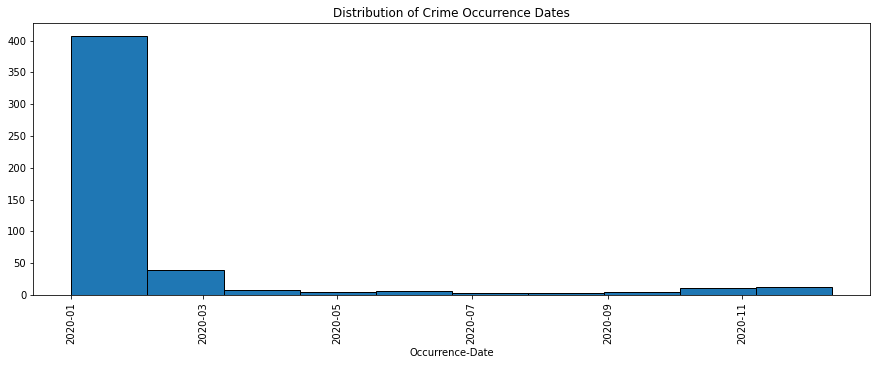

In [301]:
# Distribution of Crime Occurrence Dates
plt.figure(figsize =(15,5))
plt.hist(df['DATE_OCC'],bins=10,edgecolor="black")
plt.title('Distribution of Crime Occurrence Dates')
plt.xlabel('Occurrence-Date')
plt.xticks(rotation=90)
plt.show()

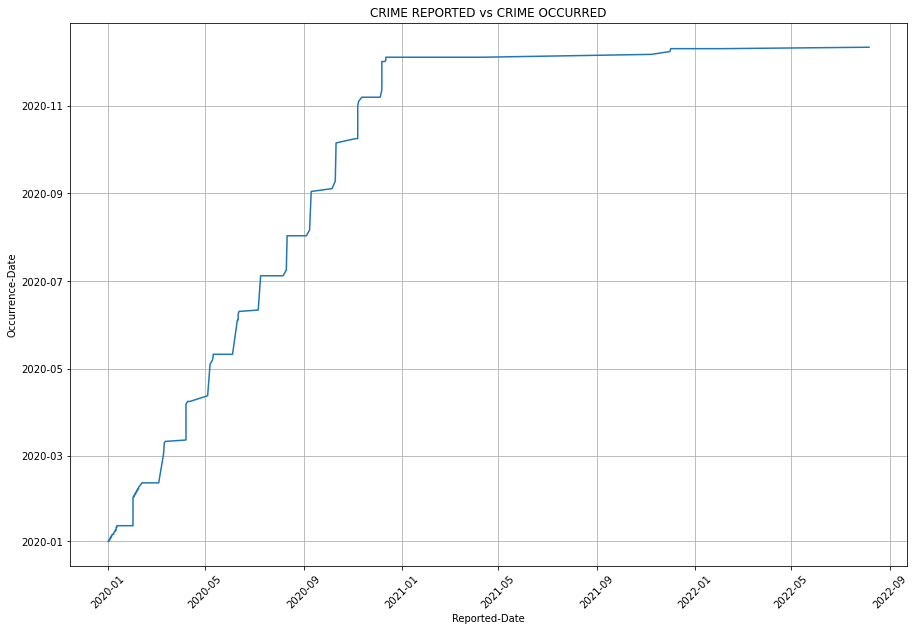

In [305]:
# Line Chart of Crime Reported Date vs Crime Occurrence Date

plt.figure(figsize =(15,10))
y = sorted_Occ
x = sorted_rptd
plt.plot(x,y)

plt.title('CRIME REPORTED vs CRIME OCCURRED')
plt.xlabel('Reported-Date')
plt.ylabel('Occurrence-Date')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


In [335]:
df.columns

Index(['DR_NO', 'Date_Rptd', 'DATE_OCC', 'AREA_NAME', 'Crm_Cd', 'Crm_Cd_Desc',
       'Vict_Age', 'Vict_Sex', 'Premis_Desc', 'Status', 'Location', 'LAT',
       'LON'],
      dtype='object')

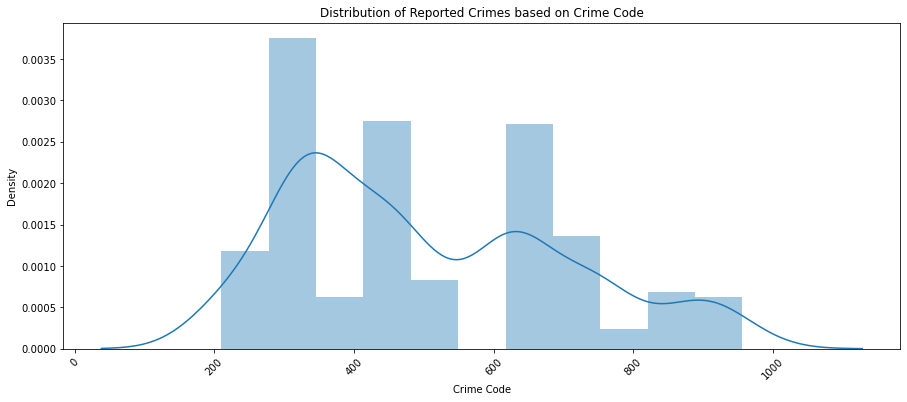

In [344]:
# Distribution of crime reportedbased on crime code.
plt.figure(figsize=(15, 6))
sns.distplot(df['Crm_Cd'])
plt.title('Distribution of Reported Crimes based on Crime Code')
plt.xlabel('Crime Code')
plt.xticks(rotation=45)
plt.show()

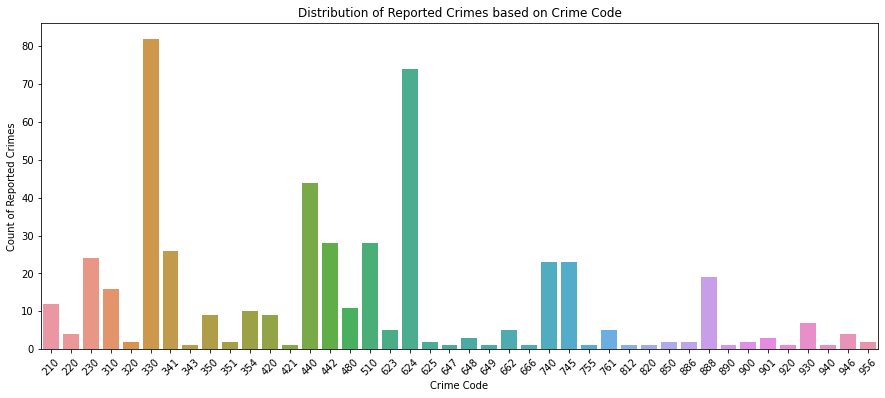

In [342]:
# Count of crime reportedbased on crime code.
plt.figure(figsize=(15, 6))
sns.countplot(df['Crm_Cd'])
plt.title('Count of Reported Crimes based on Crime Code')
plt.xlabel('Crime Code')
plt.ylabel('Count of Reported Crimes')
plt.xticks(rotation=45)
plt.show()

## 5. Spatial Analysis:

   - Utilize the geographical information (Latitude and Longitude) to perform spatial analysis.

   - Visualize crime hotspots on a map.

In [129]:
df[['LAT','LON']]

,LAT,LON
0,34.01,-118.30
1,34.05,-118.25
2,34.17,-118.40
3,34.22,-118.45
4,34.05,-118.26
...,...,...
494,34.05,-118.26
495,34.05,-118.26
496,34.05,-118.25
497,34.05,-118.25


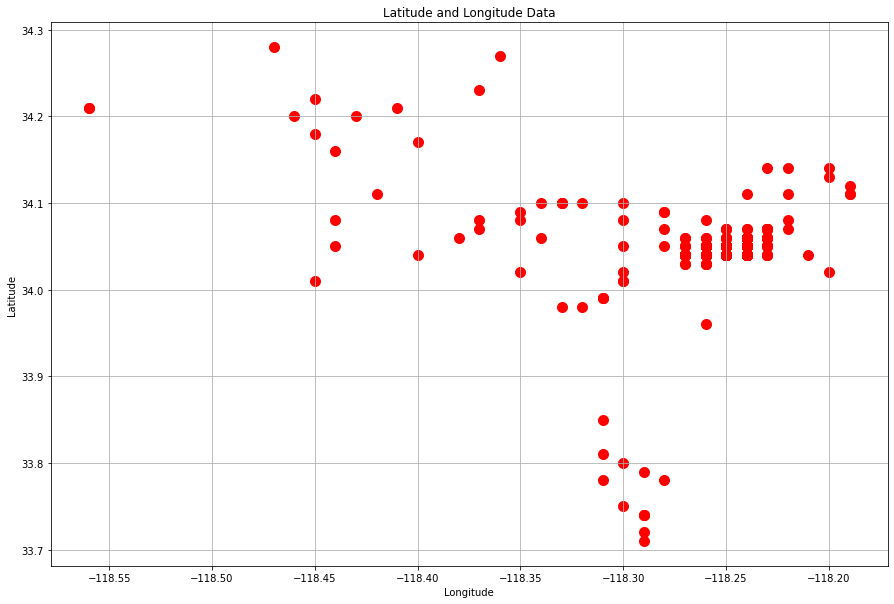

In [132]:
# Latitude and Longitude to perform spatial analysis
plt.figure(figsize=(15, 10))
plt.scatter(df['LON'], df['LAT'], color='red', marker='o', s=100)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude and Longitude Data')
plt.grid(True)
plt.show()


In [269]:
df1 = df[['LAT','LON']]

In [148]:
# Visualize crime hotspots on a map.
# Visualizing with Folium
m = folium.Map(location=[df['LAT'].mean(), df['LON'].mean()], zoom_start=10)
for index, row in df.iterrows():
    folium.Marker([row['LAT'], row['LON']]).add_to(m)


display(m)

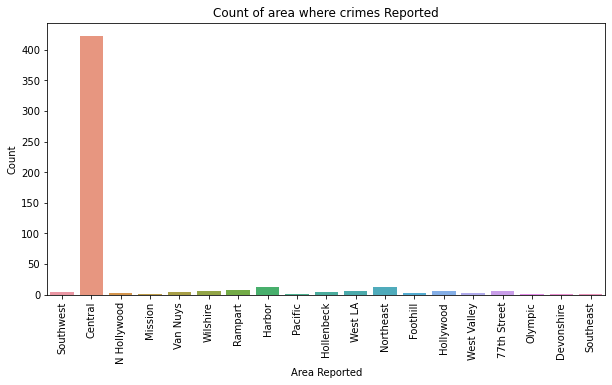

In [306]:
# Count of area where crime Reported

plt.figure(figsize=(10, 5))
sns.countplot(x=df['AREA_NAME'])
plt.title('Count of area where crimes Reported')
plt.xlabel('Area Reported')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

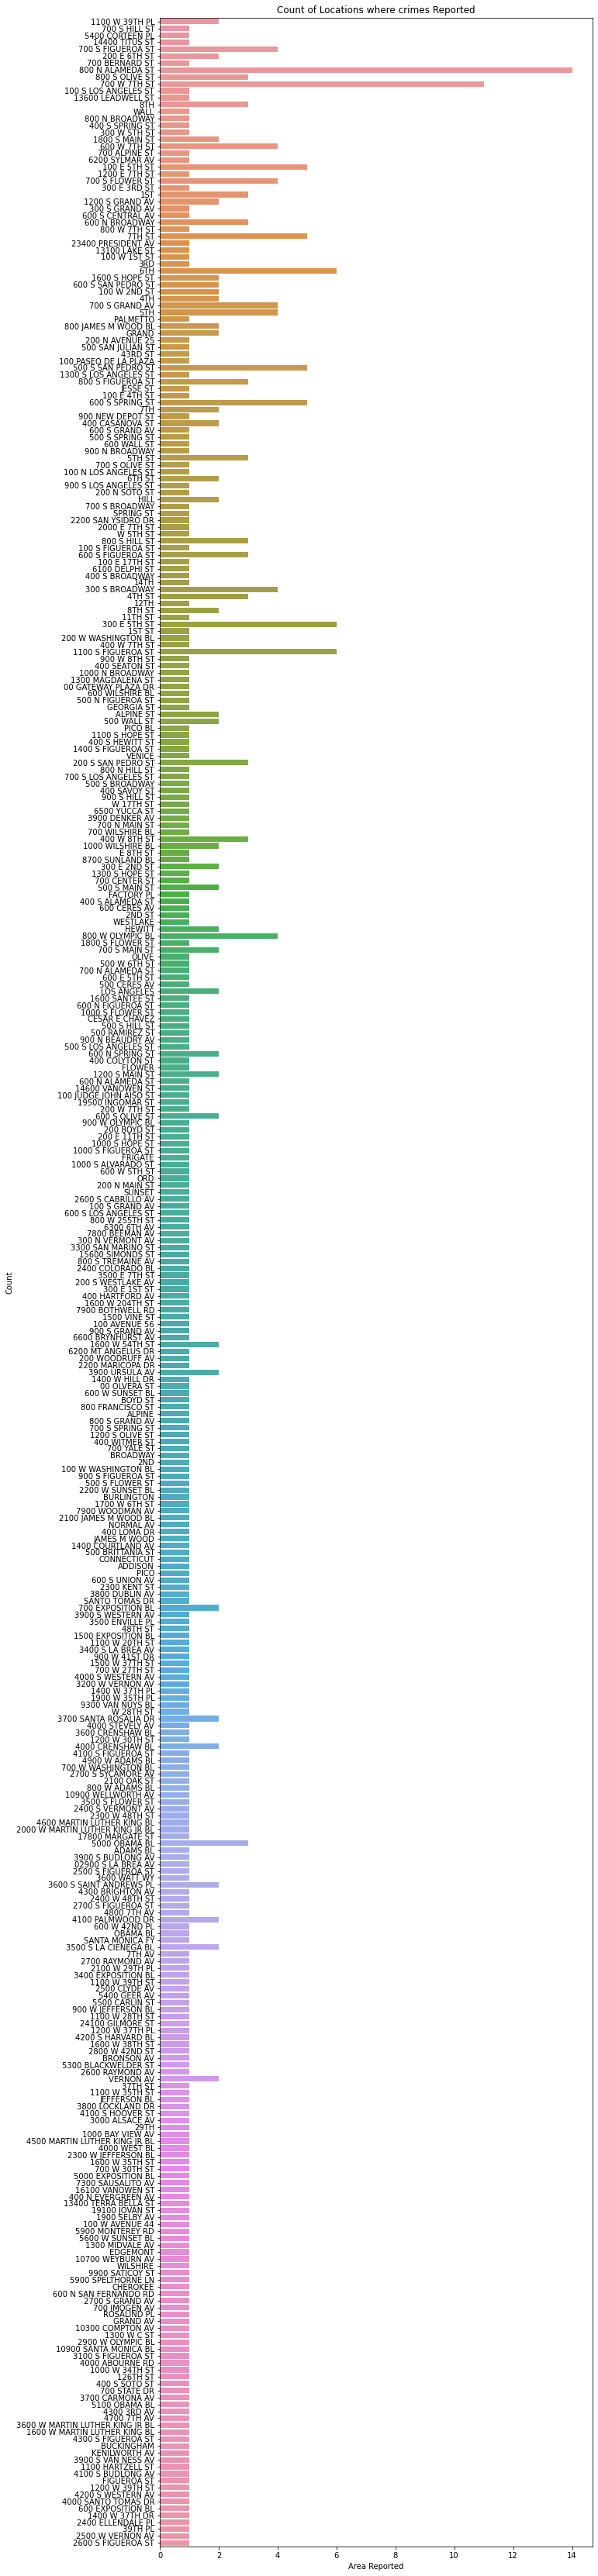

In [308]:
# Count of Locations where crime Reported

plt.figure(figsize=(10, 60))
sns.countplot(y=df['Location'])
plt.title('Count of Locations where crimes Reported')
plt.xlabel('Area Reported')
plt.ylabel('Count')
plt.show()

## 6. Victim Demographics:

   - Investigate the distribution of victim ages and genders.

   - Identify common premises descriptions where crimes occur.

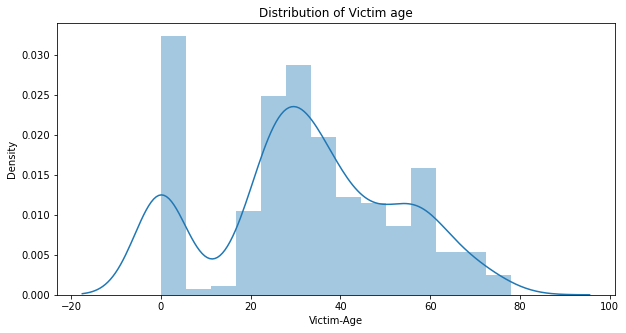

In [340]:
# Distribution of victim ages and genders.
plt.figure(figsize=(10, 5))
sns.distplot(df['Vict_Age'])
plt.title('Distribution of Victim age')
plt.xlabel('Victim-Age')
plt.show()

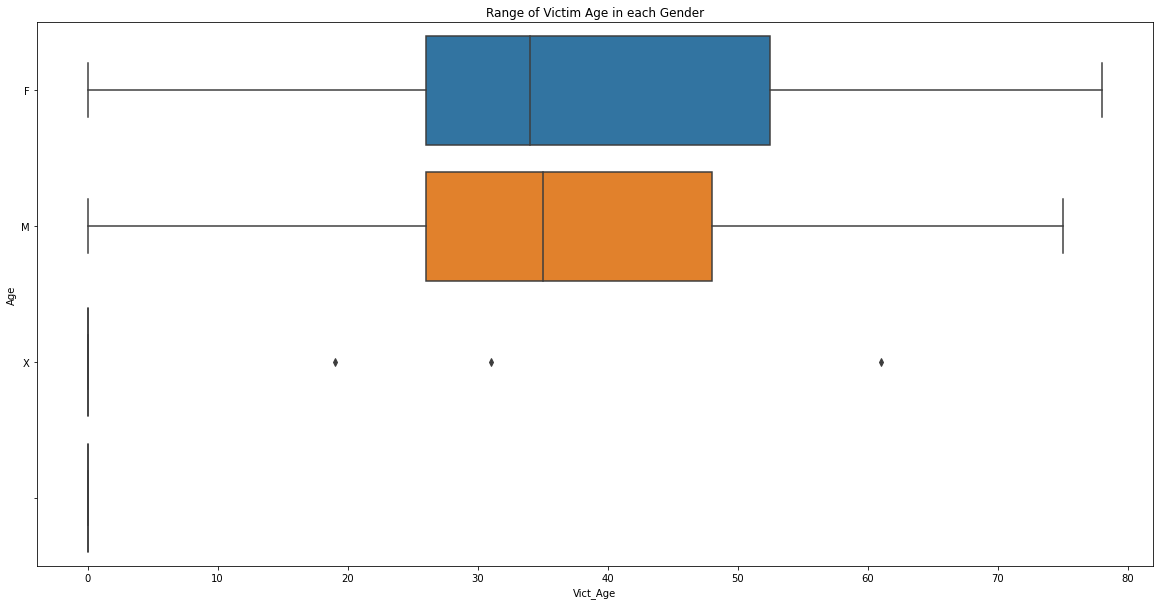

In [322]:
# Victim Age Range vs Gender
plt.figure(figsize=(20,10))
sns.boxplot(y = df['Vict_Sex'], x = df['Vict_Age'],orient="h")
plt.title('Range of Victim Age in each Gender')
plt.ylabel('Gender')
plt.ylabel('Age')

plt.show()

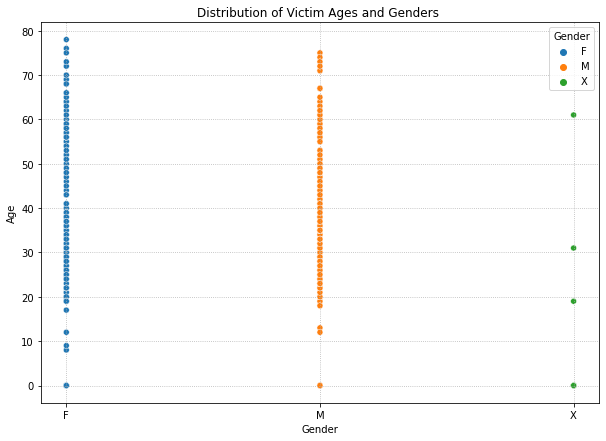

In [219]:
# Distribution of Age and Gender
plt.figure(figsize=(10,7))  #width , height
sns.scatterplot(x=df['Vict_Sex'],y=df['Vict_Age'],marker="o",hue=df['Vict_Sex'])
plt.title("Distribution of Victim Ages and Genders ")
plt.ylabel('Age')
plt.xlabel('Gender')
plt.legend(loc='upper right', title='Gender')
plt.grid(linestyle=":")
plt.show()

In [332]:
#Crime rates between different sex
cr = df.groupby(['Vict_Sex']).size()
cr

Vict_Sex
      27
F    155
M    278
X     39
dtype: int64

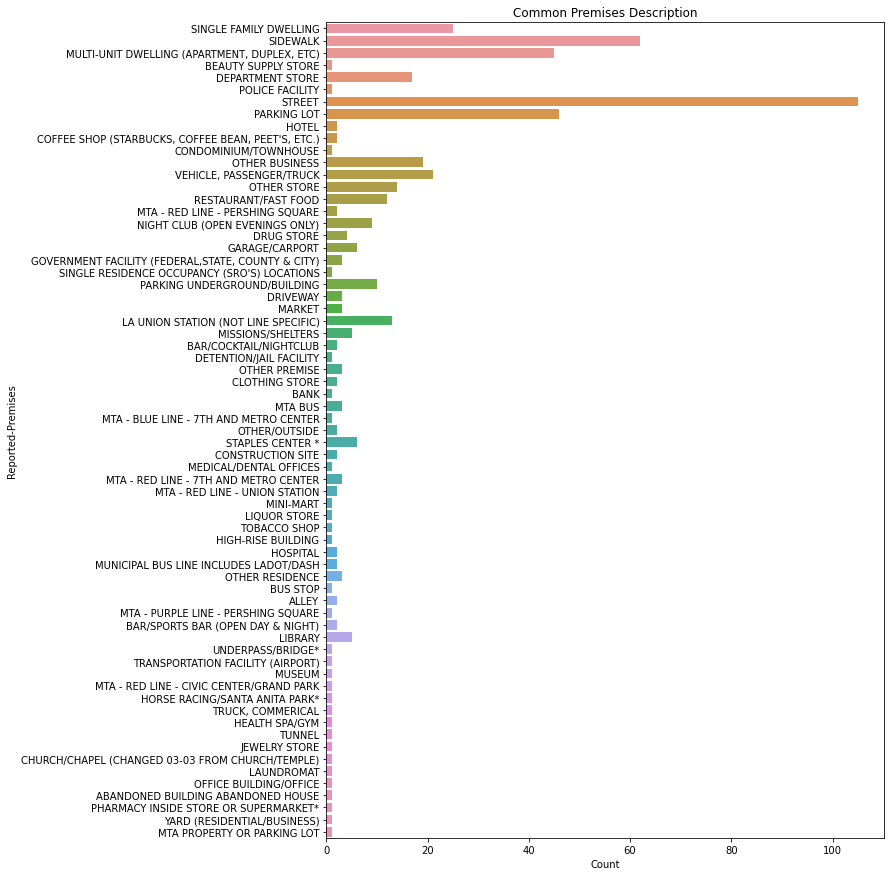

In [186]:
# Common premises where crimes occur.
plt.figure(figsize=(10, 15))
sns.countplot(y=df['Premis_Desc'])
plt.title('Common Premises Description')
plt.ylabel('Reported-Premises')
plt.xlabel('Count')
plt.show()

## 7. Status Analysis:

   - Examine the status of reported crimes.

   - Classify crimes based on their current status.

In [248]:
# The status of reported crimes
status_counts =  df['Status'].value_counts()
print("Status of Reported Crimes:")
print(status_counts)

Status of Reported Crimes:
IC    447
AA     27
AO     24
JO      1
Name: Status, dtype: int64


In [263]:
# Crimes based on their current status.
pd.set_option('display.max_rows', None)
status_crime_counts = df.groupby(['Status', 'Crm_Cd_Desc']).size()
print("Classification of Crimes Based on Status:")
print(status_crime_counts)

Classification of Crimes Based on Status:
Status  Crm_Cd_Desc                                             
AA      ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT               6
        ATTEMPTED ROBBERY                                            1
        BATTERY - SIMPLE ASSAULT                                     1
        BATTERY POLICE (SIMPLE)                                      1
        BIKE - STOLEN                                                1
        BURGLARY                                                     1
        CRIMINAL THREATS - NO WEAPON DISPLAYED                       1
        DOCUMENT FORGERY / STOLEN FELONY                             1
        FAILURE TO YIELD                                             1
        ROBBERY                                                      4
        THEFT, PERSON                                                1
        THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     1
        TRESPASSING                      

### Q1. Where are the geographical hotspots for reported crimes?

The geographical hotspots for reported crimes are between Latitude 34 and 34.1 & Longitude -118.30 and -118.20.

### Q2. What is the distribution of victim ages in reported crimes?

The distribution of victim ages in reported crimes is slightly right skewed and majority of age lie between 20 - 55

### Q3. Is there a significant difference in crime rates between male and female victims?

Yes, there is significant difference in crime ratese between male and female there are 155 Female victims and 278 Male victims.

### Q4. Where do most crimes occur based on the "Location" column?

Based on Location column most crimes occur in "800 N ALAMEDA ST" second by "700W 7th St" and looking at Area the "Cental" area is where most crimes occur.

### Q5. What is the distribution of reported crimes based on Crime Code?

The distribution of reported crimes based on Crime Code in Right Skewed with most crime codes being 330 - "BURGLARY FROM VEHICLE" seconded by 624 - "BATTERY - SIMPLE ASSAULT".